In [1281]:
import pandas as pd
import numpy as np

data = pd.read_csv('dataset.csv')

In [1282]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.989999999999998,10.380000000000001,122.799999999999997,1001.000000000000000,0.118400000000000,0.277600000000000,0.300100000000000,0.147100000000000,...,25.379999999999999,17.329999999999998,184.599999999999994,2019.000000000000000,0.162200000000000,0.665600000000000,0.711900000000000,0.265400000000000,0.460100000000000,0.118900000000000
1,842517,M,20.570000000000000,17.770000000000000,132.900000000000006,1326.000000000000000,0.084740000000000,0.078640000000000,0.086900000000000,0.070170000000000,...,24.989999999999998,23.410000000000000,158.800000000000011,1956.000000000000000,0.123800000000000,0.186600000000000,0.241600000000000,0.186000000000000,0.275000000000000,0.089020000000000
2,84300903,M,19.690000000000001,21.250000000000000,130.000000000000000,1203.000000000000000,0.109600000000000,0.159900000000000,0.197400000000000,0.127900000000000,...,23.570000000000000,25.530000000000001,152.500000000000000,1709.000000000000000,0.144400000000000,0.424500000000000,0.450400000000000,0.243000000000000,0.361300000000000,0.087580000000000
3,84348301,M,11.420000000000000,20.379999999999999,77.579999999999998,386.100000000000023,0.142500000000000,0.283900000000000,0.241400000000000,0.105200000000000,...,14.910000000000000,26.500000000000000,98.870000000000005,567.700000000000045,0.209800000000000,0.866300000000000,0.686900000000000,0.257500000000000,0.663800000000000,0.173000000000000
4,84358402,M,20.289999999999999,14.340000000000000,135.099999999999994,1297.000000000000000,0.100300000000000,0.132800000000000,0.198000000000000,0.104300000000000,...,22.539999999999999,16.670000000000002,152.199999999999989,1575.000000000000000,0.137400000000000,0.205000000000000,0.400000000000000,0.162500000000000,0.236400000000000,0.076780000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.559999999999999,22.390000000000001,142.000000000000000,1479.000000000000000,0.111000000000000,0.115900000000000,0.243900000000000,0.138900000000000,...,25.449999999999999,26.399999999999999,166.099999999999994,2027.000000000000000,0.141000000000000,0.211300000000000,0.410700000000000,0.221600000000000,0.206000000000000,0.071150000000000
565,926682,M,20.129999999999999,28.250000000000000,131.199999999999989,1261.000000000000000,0.097800000000000,0.103400000000000,0.144000000000000,0.097910000000000,...,23.690000000000001,38.250000000000000,155.000000000000000,1731.000000000000000,0.116600000000000,0.192200000000000,0.321500000000000,0.162800000000000,0.257200000000000,0.066370000000000
566,926954,M,16.600000000000001,28.079999999999998,108.299999999999997,858.100000000000023,0.084550000000000,0.102300000000000,0.092510000000000,0.053020000000000,...,18.980000000000000,34.119999999999997,126.700000000000003,1124.000000000000000,0.113900000000000,0.309400000000000,0.340300000000000,0.141800000000000,0.221800000000000,0.078200000000000
567,927241,M,20.600000000000001,29.329999999999998,140.099999999999994,1265.000000000000000,0.117800000000000,0.277000000000000,0.351400000000000,0.152000000000000,...,25.739999999999998,39.420000000000002,184.599999999999994,1821.000000000000000,0.165000000000000,0.868100000000000,0.938700000000000,0.265000000000000,0.408700000000000,0.124000000000000


In [1283]:
data = data.sample(frac=1).reset_index(drop=True)

In [1284]:
# Traverse each cell in the DataFrame
for index, row in data.iterrows():
    # Check if any cell in the row is empty
    if row.isnull().values.any():
        # Drop the entire row
        data.drop(index, inplace=True)


labels = data['diagnosis']
labels
data = data.drop('diagnosis', axis=1)
images = data
images
image_array = images.to_numpy()
label_array = labels.to_numpy()

In [1285]:
images

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,88518501,11.500000000000000,18.449999999999999,73.280000000000001,407.399999999999977,0.093450000000000,0.059910000000000,0.026380000000000,0.020690000000000,0.183400000000000,...,12.970000000000001,22.460000000000001,83.120000000000005,508.899999999999977,0.118300000000000,0.104900000000000,0.081050000000000,0.065440000000000,0.274000000000000,0.064870000000000
1,8812818,13.560000000000000,13.900000000000000,88.590000000000003,561.299999999999955,0.105100000000000,0.119200000000000,0.078600000000000,0.044510000000000,0.196200000000000,...,14.980000000000000,17.129999999999999,101.099999999999994,686.600000000000023,0.137600000000000,0.269800000000000,0.257700000000000,0.090900000000000,0.306500000000000,0.081770000000000
2,857010,18.649999999999999,17.600000000000001,123.700000000000003,1076.000000000000000,0.109900000000000,0.168600000000000,0.197400000000000,0.100900000000000,0.190700000000000,...,22.820000000000000,21.320000000000000,150.599999999999994,1567.000000000000000,0.167900000000000,0.509000000000000,0.734500000000000,0.237800000000000,0.379900000000000,0.091850000000000
3,906564,14.690000000000000,13.980000000000000,98.219999999999999,656.100000000000023,0.103100000000000,0.183600000000000,0.145000000000000,0.063000000000000,0.208600000000000,...,16.460000000000001,18.340000000000000,114.099999999999994,809.200000000000045,0.131200000000000,0.363500000000000,0.321900000000000,0.110800000000000,0.282700000000000,0.092080000000000
4,894604,10.250000000000000,16.180000000000000,66.519999999999996,324.199999999999989,0.106100000000000,0.111100000000000,0.067260000000000,0.039650000000000,0.174300000000000,...,11.279999999999999,20.609999999999999,71.530000000000001,390.399999999999977,0.140200000000000,0.236000000000000,0.189800000000000,0.097440000000000,0.260800000000000,0.097020000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,862261,9.787000000000001,19.940000000000001,62.109999999999999,294.500000000000000,0.102400000000000,0.053010000000000,0.006829000000000,0.007937000000000,0.135000000000000,...,10.920000000000000,26.289999999999999,68.810000000000002,366.100000000000023,0.131600000000000,0.094730000000000,0.020490000000000,0.023810000000000,0.193400000000000,0.089880000000000
565,8910988,21.750000000000000,20.989999999999998,147.300000000000011,1491.000000000000000,0.094010000000000,0.196100000000000,0.219500000000000,0.108800000000000,0.172100000000000,...,28.190000000000001,28.180000000000000,195.900000000000006,2384.000000000000000,0.127200000000000,0.472500000000000,0.580700000000000,0.184100000000000,0.283300000000000,0.088580000000000
566,8711003,12.250000000000000,17.940000000000001,78.269999999999996,460.300000000000011,0.086540000000000,0.066790000000000,0.038850000000000,0.023310000000000,0.197000000000000,...,13.590000000000000,25.219999999999999,86.599999999999994,564.200000000000045,0.121700000000000,0.178800000000000,0.194300000000000,0.082110000000000,0.311300000000000,0.081320000000000
567,911296202,27.420000000000002,26.270000000000000,186.900000000000006,2501.000000000000000,0.108400000000000,0.198800000000000,0.363500000000000,0.168900000000000,0.206100000000000,...,36.039999999999999,31.370000000000001,251.199999999999989,4254.000000000000000,0.135700000000000,0.425600000000000,0.683300000000000,0.262500000000000,0.264100000000000,0.074270000000000


In [1286]:
labels

0      B
1      B
2      M
3      B
4      B
      ..
564    B
565    M
566    B
567    M
568    B
Name: diagnosis, Length: 563, dtype: object

In [1287]:
image_array

array([[8.85185010e+07, 1.15000000e+01, 1.84500000e+01, ...,
        6.54400000e-02, 2.74000000e-01, 6.48700000e-02],
       [8.81281800e+06, 1.35600000e+01, 1.39000000e+01, ...,
        9.09000000e-02, 3.06500000e-01, 8.17700000e-02],
       [8.57010000e+05, 1.86500000e+01, 1.76000000e+01, ...,
        2.37800000e-01, 3.79900000e-01, 9.18500000e-02],
       ...,
       [8.71100300e+06, 1.22500000e+01, 1.79400000e+01, ...,
        8.21100000e-02, 3.11300000e-01, 8.13200000e-02],
       [9.11296202e+08, 2.74200000e+01, 2.62700000e+01, ...,
        2.62500000e-01, 2.64100000e-01, 7.42700000e-02],
       [9.17890000e+04, 1.12600000e+01, 1.98300000e+01, ...,
        2.83200000e-02, 2.55700000e-01, 7.61300000e-02]])

In [1288]:
label_array

array(['B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M

In [1289]:
label_array = np.where(label_array == 'M', 1, 0)

In [1290]:
images_train, images_test, label_train, label_test = (image_array[:356],
                                                      image_array[356:], 
                                                      label_array[:356],
                                                      label_array[356:])

In [1291]:
output = np.zeros(9)

In [1292]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegressionMBGD():

    def __init__(self, lr, n_iters=1000, batch_size=32):
        self.lr = lr
        self.n_iters = n_iters
        self.batch_size = batch_size
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        num_batches = int(np.ceil(n_samples/self.batch_size))
        costs = []

        for i in range(self.n_iters):
            batch_indices = np.random.choice(n_samples, self.batch_size)
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]

            linear_pred = np.dot(X_batch, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/self.batch_size) * np.dot(X_batch.T, (predictions - y_batch))
            db = (1/self.batch_size) * np.sum(predictions-y_batch)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db

            # Compute cost function on current batch
            cost = -np.mean(y_batch*np.log(predictions) + (1-y_batch)*np.log(1-predictions))
            costs.append(cost)

        # Plot learning curves
        plt.plot(costs)
        plt.xlabel("Iterations")
        plt.ylabel("Cost Function")
        plt.title("Learning Curves for Mini-Batch Gradient Descent")
        plt.show()

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.7 else 1 for y in y_pred]
        return class_pred


<ipython-input-1292-cdbec6125089>:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
<ipython-input-1292-cdbec6125089>:38: RuntimeWarning: divide by zero encountered in log
  cost = -np.mean(y_batch*np.log(predictions) + (1-y_batch)*np.log(1-predictions))
<ipython-input-1292-cdbec6125089>:38: RuntimeWarning: invalid value encountered in multiply
  cost = -np.mean(y_batch*np.log(predictions) + (1-y_batch)*np.log(1-predictions))


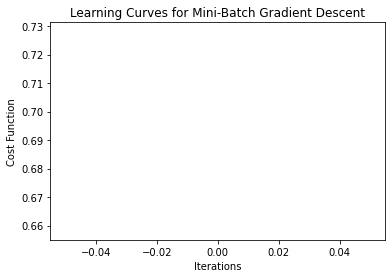

63.76811594202898


In [1293]:
clf = LogisticRegressionMBGD(lr=0.01)
clf.fit(images_train,label_train)
y_pred = clf.predict(images_test)

def accuracy(y_pred, label_test):
    return np.sum(y_pred==label_test)/len(label_test)

acc = accuracy(y_pred, label_test)
print(acc*100)

output[0] = acc*100

<ipython-input-1292-cdbec6125089>:38: RuntimeWarning: divide by zero encountered in log
  cost = -np.mean(y_batch*np.log(predictions) + (1-y_batch)*np.log(1-predictions))
<ipython-input-1292-cdbec6125089>:38: RuntimeWarning: invalid value encountered in multiply
  cost = -np.mean(y_batch*np.log(predictions) + (1-y_batch)*np.log(1-predictions))
<ipython-input-1292-cdbec6125089>:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


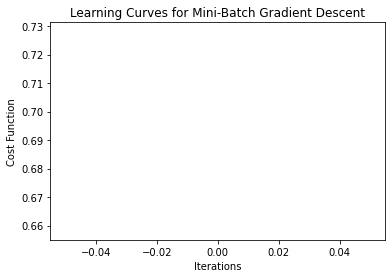

36.231884057971016


In [1294]:
clf = LogisticRegressionMBGD(lr=0.001)
clf.fit(images_train,label_train)
y_pred = clf.predict(images_test)

def accuracy(y_pred, label_test):
    return np.sum(y_pred==label_test)/len(label_test)

acc = accuracy(y_pred, label_test)
print(acc*100)
output[3] = acc*100

<ipython-input-1292-cdbec6125089>:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
<ipython-input-1292-cdbec6125089>:38: RuntimeWarning: divide by zero encountered in log
  cost = -np.mean(y_batch*np.log(predictions) + (1-y_batch)*np.log(1-predictions))
<ipython-input-1292-cdbec6125089>:38: RuntimeWarning: invalid value encountered in multiply
  cost = -np.mean(y_batch*np.log(predictions) + (1-y_batch)*np.log(1-predictions))


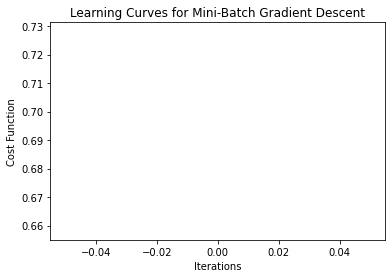

63.76811594202898


In [1295]:
clf = LogisticRegressionMBGD(lr=0.0001)
clf.fit(images_train,label_train)
y_pred = clf.predict(images_test)

def accuracy(y_pred, label_test):
    return np.sum(y_pred==label_test)/len(label_test)

acc = accuracy(y_pred, label_test)
print(acc*100)
output[3] = acc*100

In [1296]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegressionSGD():

    def __init__(self, lr, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.costs = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            random_index = np.random.randint(n_samples)
            sample_X = X[random_index]
            sample_y = y[random_index]

            linear_pred = np.dot(sample_X, self.weights) + self.bias
            prediction = sigmoid(linear_pred)

            dw = np.dot(sample_X.T, (prediction - sample_y))
            db = prediction - sample_y

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

            # calculate cost and append to costs list
            cost = -np.mean(sample_y*np.log(prediction) + (1-sample_y)*np.log(1-prediction))
            self.costs.append(cost)

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.7 else 1 for y in y_pred]
        return class_pred

    def plot_learning_curve(self):
        plt.plot(range(self.n_iters), self.costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Learning Curve')
        plt.show()



63.76811594202898


<ipython-input-1296-550da1904b06>:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
<ipython-input-1296-550da1904b06>:36: RuntimeWarning: divide by zero encountered in log
  cost = -np.mean(sample_y*np.log(prediction) + (1-sample_y)*np.log(1-prediction))
<ipython-input-1296-550da1904b06>:36: RuntimeWarning: invalid value encountered in multiply
  cost = -np.mean(sample_y*np.log(prediction) + (1-sample_y)*np.log(1-prediction))


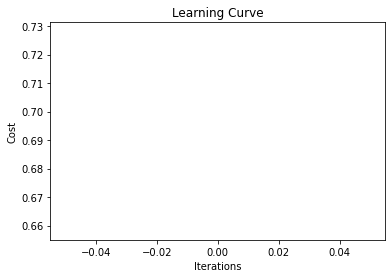

In [1297]:
clf = LogisticRegressionSGD(lr=0.01)
clf.fit(images_train,label_train)
y_pred = clf.predict(images_test)

def accuracy(y_pred, label_test):
    return np.sum(y_pred==label_test)/len(label_test)

acc = accuracy(y_pred, label_test)
print(acc*100)
clf.plot_learning_curve()
output[1] = acc*100

<ipython-input-1296-550da1904b06>:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
<ipython-input-1296-550da1904b06>:36: RuntimeWarning: divide by zero encountered in log
  cost = -np.mean(sample_y*np.log(prediction) + (1-sample_y)*np.log(1-prediction))
<ipython-input-1296-550da1904b06>:36: RuntimeWarning: invalid value encountered in multiply
  cost = -np.mean(sample_y*np.log(prediction) + (1-sample_y)*np.log(1-prediction))


63.76811594202898


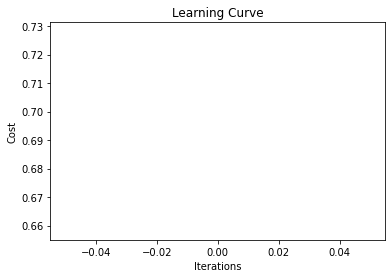

In [1298]:
clf = LogisticRegressionSGD(lr=0.001)
clf.fit(images_train,label_train)
y_pred = clf.predict(images_test)

def accuracy(y_pred, label_test):
    return np.sum(y_pred==label_test)/len(label_test)

acc = accuracy(y_pred, label_test)
print(acc*100)
clf.plot_learning_curve()
output[1] = acc*100

<ipython-input-1296-550da1904b06>:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
<ipython-input-1296-550da1904b06>:36: RuntimeWarning: divide by zero encountered in log
  cost = -np.mean(sample_y*np.log(prediction) + (1-sample_y)*np.log(1-prediction))
<ipython-input-1296-550da1904b06>:36: RuntimeWarning: invalid value encountered in multiply
  cost = -np.mean(sample_y*np.log(prediction) + (1-sample_y)*np.log(1-prediction))


36.231884057971016


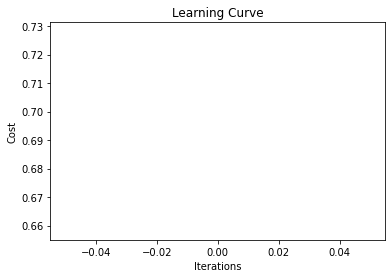

In [1299]:
clf = LogisticRegressionSGD(lr=0.0001)
clf.fit(images_train,label_train)
y_pred = clf.predict(images_test)

def accuracy(y_pred, label_test):
    return np.sum(y_pred==label_test)/len(label_test)

acc = accuracy(y_pred, label_test)
print(acc*100)
clf.plot_learning_curve()
output[1] = acc*100

In [1300]:
import numpy as np

import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegressionBGD():

    def __init__(self, lr, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.costs = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            prediction = sigmoid(linear_pred)

            dw = np.dot(X.T, (prediction - y)) / n_samples
            db = np.mean(prediction - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

            cost = -np.mean(y*np.log(prediction) + (1-y)*np.log(1-prediction))
            self.costs.append(cost)

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.7 else 1 for y in y_pred]
        return class_pred


<ipython-input-1300-4eb24e50f87b>:6: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
<ipython-input-1300-4eb24e50f87b>:32: RuntimeWarning: divide by zero encountered in log
  cost = -np.mean(y*np.log(prediction) + (1-y)*np.log(1-prediction))
<ipython-input-1300-4eb24e50f87b>:32: RuntimeWarning: invalid value encountered in multiply
  cost = -np.mean(y*np.log(prediction) + (1-y)*np.log(1-prediction))


36.231884057971016


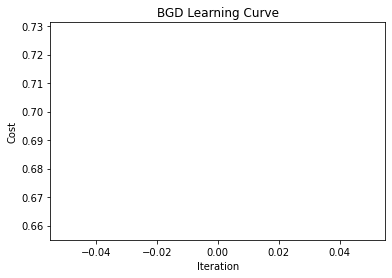

In [1301]:
clf = LogisticRegressionBGD(lr=0.01)
clf.fit(images_train,label_train)
y_pred = clf.predict(images_test)

def accuracy(y_pred, label_test):
    return np.sum(y_pred==label_test)/len(label_test)

acc = accuracy(y_pred, label_test)
print(acc*100)


# plot the learning curve
plt.plot(clf.costs)
plt.title('BGD Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()
output[2] = acc*100

<ipython-input-1300-4eb24e50f87b>:6: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
<ipython-input-1300-4eb24e50f87b>:32: RuntimeWarning: divide by zero encountered in log
  cost = -np.mean(y*np.log(prediction) + (1-y)*np.log(1-prediction))
<ipython-input-1300-4eb24e50f87b>:32: RuntimeWarning: invalid value encountered in multiply
  cost = -np.mean(y*np.log(prediction) + (1-y)*np.log(1-prediction))


36.231884057971016


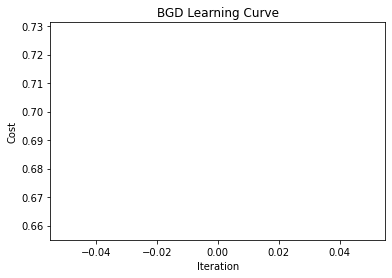

In [1302]:
clf = LogisticRegressionBGD(lr=0.001)
clf.fit(images_train,label_train)
y_pred = clf.predict(images_test)

def accuracy(y_pred, label_test):
    return np.sum(y_pred==label_test)/len(label_test)

acc = accuracy(y_pred, label_test)
print(acc*100)


# plot the learning curve
plt.plot(clf.costs)
plt.title('BGD Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()
output[2] = acc*100

<ipython-input-1300-4eb24e50f87b>:6: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
<ipython-input-1300-4eb24e50f87b>:32: RuntimeWarning: divide by zero encountered in log
  cost = -np.mean(y*np.log(prediction) + (1-y)*np.log(1-prediction))
<ipython-input-1300-4eb24e50f87b>:32: RuntimeWarning: invalid value encountered in multiply
  cost = -np.mean(y*np.log(prediction) + (1-y)*np.log(1-prediction))


36.231884057971016


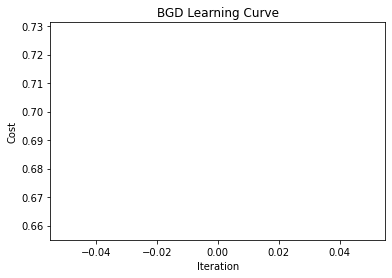

In [1303]:
clf = LogisticRegressionBGD(lr=0.0001)
clf.fit(images_train,label_train)
y_pred = clf.predict(images_test)

def accuracy(y_pred, label_test):
    return np.sum(y_pred==label_test)/len(label_test)

acc = accuracy(y_pred, label_test)
print(acc*100)


# plot the learning curve
plt.plot(clf.costs)
plt.title('BGD Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()
output[2] = acc*100

In [1304]:
df = pd.DataFrame(output)
pd.set_option("display.float_format", lambda x: "%.15f" % x)
df.T


,0,1,2,3,4,5,6,7,8
0,63.768115942028977,36.231884057971016,36.231884057971016,63.768115942028977,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000
